In [53]:
# Important necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from matplotlib.lines import Line2D
%matplotlib inline  

# Reading the Data

In [4]:
def readfile(name, folder='ntuples_2_6/', lumi=37*1000):
    """ Read .evt and .meta files as output by monojet.C and 
        properly weigh events
    """
    data = pd.read_csv(folder+name+'.evt', header=0, delimiter=',', skipinitialspace=True)
    data.meta = pd.read_csv(folder+name+'.meta', header=0, delimiter=',', skipinitialspace=True)
    if 'weight' in data.columns:
        data['weight'] *= (data.meta['cxn']*lumi/data.meta['sum_weight'])[0]
    else:
        data['weight'] = (data.meta['cxn']*lumi / data.meta['nevt'])[0]  
    return data

In [5]:
# Read background distributions
bkg = ['bkg_ttbar_semilep', 'bkg_ttbar_dilep', 'bkg_Wj', 'bkg_Zj']
bkg = [ readfile(f) for f in bkg ]

In [6]:
def to_str(num):
    if num <= .9:
        return '{:.1g}'.format(num)
    elif num!= 1:
        return '{:.2g}'.format(num)
    else:
        return '1.0'

# Array of rinv values run over
rinv = [.01, .1, .2, .3, .4, .5, .6, .7, .8, .9, .98, .99, 1.0 ]
rinv_str_base = [  to_str(r)  for r in rinv ]

# Read signal distributions for various DM masses

rinv_str = [ 'monojet_10_rinv' + st for st in rinv_str_base ]
sig10 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

rinv_str = [ 'monojet_20_rinv' + st for st in rinv_str_base ]
sig20 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

rinv_str = [ 'monojet_50_rinv' + st for st in rinv_str_base ]
sig50 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

rinv_str = [ 'monojet_100_rinv' + st for st in rinv_str_base ]
sig100 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

rinv_str = [ 'monojet_500_rinv' + st for st in rinv_str_base ]
sig500 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

rinv_str = [ 'monojet_1000_rinv' + st for st in rinv_str_base ]
sig1000 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

# Plot distributions

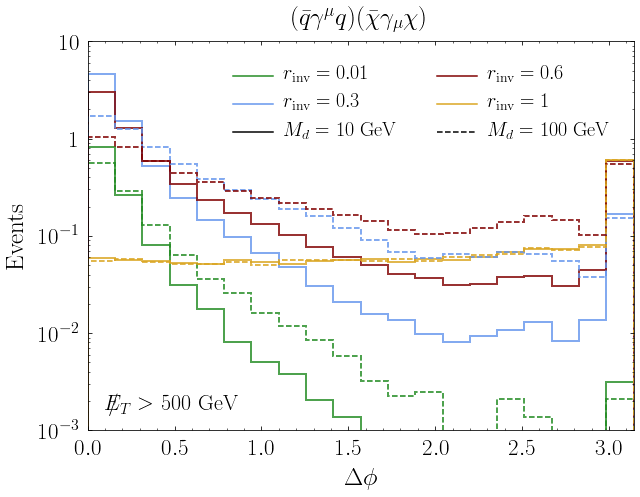

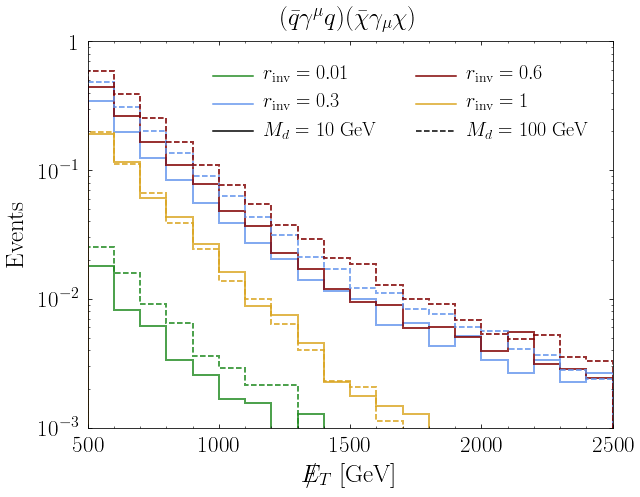

In [95]:
title = "$(\\bar q \gamma^\mu q)(\\bar \chi \gamma_\mu \chi)$"

# make histograms
def newfig(name):
    fig=plt.figure(name,figsize=(9,7))
    plt.subplots_adjust(left=0.2, right=0.90, top=0.9, bottom=0.2)

plot_color=['forestgreen','cornflowerblue', 'maroon','goldenrod','violet','maroon','darkgrey','lightpink','black','forestgreen','cornflowerblue', 'salmon','violet','goldenrod','maroon','darkgrey','lightpink']
plot_ls=['solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid']

def plot_dphi(l, sig, lw=3, ls='solid'):
    newfig("dphi")
    coli=0
    for i,fb in enumerate(sig):
        
        if rinv[i] in l:
            
            f=fb.query('pt1 > 250 & MEt > 100')
            mylabel=("$r_{\\rm inv}=%0.1g$" % rinv[i])
            if rinv[i] > 0.9:
                mylabel="$r_{\\rm inv}=%0.2g$" % rinv[i]

            plt.hist(f['dphi'], weights=f['weight'], 
                     bins=np.linspace(0,np.pi,20 + 1),
                     histtype='step', color=plot_color[coli], alpha=.8, lw=lw, linestyle=ls,
                     label=mylabel)
            coli+=1
            plt.xlim([0,np.pi])
            plt.yscale('log', nonposy='clip')
            plt.xlabel(r'$\Delta \phi$',fontsize=25)
            plt.ylabel(r'${\rm Events}$',fontsize=25)

def plot_met(l,sig, lw=3, ls='solid'):
    newfig("met")
    coli=0
    for i,fb in enumerate(sig):
        if rinv[i] in l:
            f=fb.query('pt1 > 250 & MEt > 100')
            mylabel=("$r_{\\rm inv}=%0.1g$" % rinv[i])
            if rinv[i] > 0.9:
                mylabel="$r_{\\rm inv}=%0.2g$" % rinv[i]

            plt.hist(f['MEt'], weights=f['weight'], 
                     bins=np.linspace(500,2500,20 + 1),
                     histtype='step', color=plot_color[coli], alpha=.8, lw=lw, linestyle=ls,
                     label=mylabel)
            coli+=1
            plt.xlim([500,2500])
            plt.yscale('log', nonposy='clip')
            plt.xlabel(r'$\slash \!\!\!\! E_{T}$ [GeV]',fontsize=25)
            plt.ylabel(r'${\rm Events}$',fontsize=25)

ticklabels = ["blah","$10^{-3}$","$10^{-2}$","$10^{-1}$","$1$","$10$"]

plot_dphi(l=[.01, .3, .6,1.0], sig=sig10, lw=2)
plt.ylim([1e-3, 10])




# plt.legend(bbox_to_anchor=(0, 0, 0.97, 0.95),
#            fontsize=20, ncol=2,frameon=False,
#            handletextpad=.5,
#            borderaxespad=0.)
plot_dphi(l=[.01, .3, .6,1.0], sig=sig100, lw=2, ls = '--')
plt.ylim([1e-3, 10])
plt.title(title, fontsize=25)


ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])

ax.set_yticklabels(ticklabels)

plt.tick_params(axis='both', which='major', labelsize=23)
plt.text(0.1, 0.0015, "${\slash \!\!\!\! E_{T}} > $ 500 GeV",fontsize=22)

handles,labels = ax.get_legend_handles_labels()
handles = [Line2D([],[],color=plot_color[i]) for i in range(2)] + [Line2D([],[],color='k')] + [Line2D([],[],color=plot_color[i]) for i in range(2,4)] + [Line2D([],[],color='k',ls='--')] #, handles[2]]
labels = [labels[0], labels[1],"$M_d$ = 10 GeV",labels[2],labels[3],"$M_d$ = 100 GeV"] #, labels[2]]

leg = plt.legend(handles,labels,bbox_to_anchor=(0, 0, 0.97, 0.95),
           fontsize=20, ncol=2,frameon=False,
           handletextpad=.5,
           borderaxespad=0.)



plt.tight_layout()
plt.savefig('dphi_sig.pdf')
plt.show()


plot_met(l=[.01, .3, .6,1.0], sig=sig10, lw=2, ls = 'solid')
plot_met(l=[.01, .3, .6,1.0], sig=sig100, lw=2, ls = '--')


plt.title(title, fontsize=25)

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])

ax.set_yticklabels(ticklabels)

plt.tick_params(axis='both', which='major', labelsize=23)

handles,labels = ax.get_legend_handles_labels()
handles = [Line2D([],[],color=plot_color[i]) for i in range(2)] + [Line2D([],[],color='k')] + [Line2D([],[],color=plot_color[i]) for i in range(2,4)] + [Line2D([],[],color='k',ls='--')] #, handles[2]]
labels = [labels[0], labels[1],"$M_d$ = 10 GeV",labels[2],labels[3],"$M_d$ = 100 GeV"] #, labels[2]]

leg = plt.legend(handles,labels,bbox_to_anchor=(0, 0, 0.97, 0.95),
           fontsize=20, ncol=2,frameon=False,
           handletextpad=.5,
           borderaxespad=0.)




plt.tight_layout()
plt.ylim([1e-3, 1])
plt.savefig('met_sig.pdf')
plt.show()

In [12]:
def get_exclusion(sig, extra_cut='dphi > 0.4 ', sys_factor=1.0):
    metcut = [ 700, 800, 900, 1000, 1100, 1200 ]
    sys = [0.04, 0.0475, 0.055, 0.0625, 0.07, 0.095]
    sys = [ s*sys_factor for s in sys ]

    cut = [ 'MEt > ' + str(mc) + ' & pt1 > 300' + '& ' + extra_cut for mc in metcut]
    nevt_cut = np.asarray([ [ np.sum(d.query(c)['weight']) for d in sig ] for c in cut ])

    exclusion_bkg = np.asarray([ [np.sum(d.query(c)['weight']) for d in bkg ] for c in cut])

    sum_bkg = np.sum(exclusion_bkg, axis=1)
    exclusion=2*np.sqrt(sum_bkg + (sum_bkg*sys)**2)
    exclusion_factor = np.asarray([ exclusion[i]/c for i,c in enumerate(nevt_cut) ])

    return np.amin(exclusion_factor, axis=0)

# exc_small= get_exclusion(sig10, extra_cut='dphi < 0.4 ', sys_factor=3.0)
# exc_large= get_exclusion(sig10, extra_cut='dphi > 0.4 ')


# print(np.asarray([np.sum(d.query('dphi>0.4 & 600 > MEt > 500 & pt1 > 250')['weight']) for d in bkg]))
# print(exc_small)
# print(exc_large)

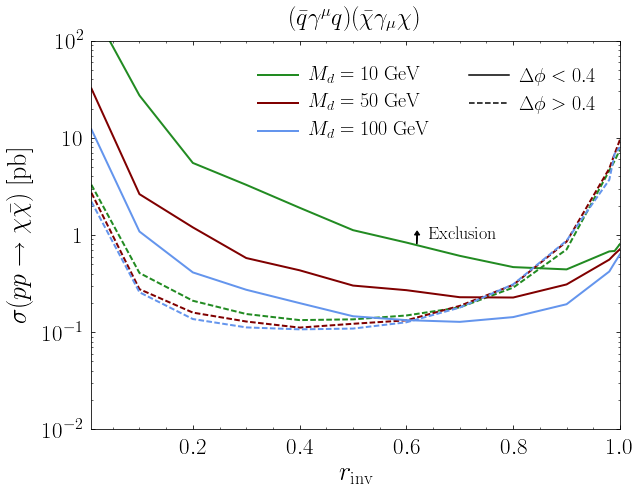

In [137]:
newfig("exc")
#plt.plot(rinv, np.sqrt(exc/(5./2.)**4), lw=3, alpha=0.3)

exc_small= get_exclusion(sig10, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig10, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig10 ])

plt.plot(rinv, exc_small*cxn, lw=2, ls='--',
                 color='forestgreen',  label=r'$\Delta \phi < 0.4$')
plt.plot(rinv, exc_large*cxn, lw=2,
                 color='forestgreen', label=r'$M_d = 10 ~\mathrm{GeV}$')

exc_small= get_exclusion(sig20, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig20, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig20 ])

exc_small= get_exclusion(sig50, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig50, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig50 ])

plt.plot(rinv, exc_small*cxn, lw=2,  ls='--',
                 color='maroon',  label=r'$\Delta \phi < 0.4$')
plt.plot(rinv, exc_large*cxn, lw=2,
                 color='maroon',label=r'$M_d = 50 ~\mathrm{GeV}$')


exc_small= get_exclusion(sig100, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig100, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig100 ])

plt.plot(rinv, exc_small*cxn, lw=2, ls='--',
                 color='cornflowerblue',  label=r'$\Delta \phi < 0.4$')
plt.plot(rinv, exc_large*cxn, lw=2,
                 color='cornflowerblue', label=r'$M_d = 100 ~\mathrm{GeV}$')

exc_small= get_exclusion(sig500, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig500, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig500 ])

exc_small= get_exclusion(sig1000, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig1000, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig1000 ])

plt.yscale('log', nonposy='clip')
plt.xlabel(r'$r_{\rm inv}$',fontsize=26)
plt.ylabel(r'$\sigma(pp \rightarrow \chi \bar\chi) \;[{\rm pb}]$',fontsize=26)
plt.xlim([0.01,1.0])
plt.ylim([1e-2, 1e2])
plt.title(title, fontsize=24)


# plt.legend(loc='upper right',
#            fontsize=20, ncol=1,frameon=False, fancybox=True)

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])

ticklabels = ["$10^{-3}$","$10^{-2}$","$10^{-1}$","$1$","$10$","$10^2$"]

plt.tick_params(axis='both', which='major', labelsize=23)
ax.set_yticklabels(ticklabels)

handles,labels = ax.get_legend_handles_labels()
handles = [handles[i] for i in [1,3,5]] + [Line2D([],[],color='k')]  + [Line2D([],[],color='k',ls='--')] #, handles[2]]
# handles = [Line2D([],[],color=plot_color[i]) for i in [1,3,5]] + [Line2D([],[],color='k')] + [Line2D([],[],color='k',ls='--')] #, handles[2]] + 
labels = [labels[1], labels[3],labels[5],r'$\Delta \phi < 0.4$',r'$\Delta \phi > 0.4$'] #, labels[2]]

leg = plt.legend(handles,labels,bbox_to_anchor=(0, 0, 0.97, 0.95),
           fontsize=20, ncol=2,frameon=False,
           handletextpad=.5,
           borderaxespad=0.)




ax = plt.axes()
ax.arrow(0.62, 0.8, 0., 0.2, head_width=0.01, head_length=0.1, fc='k', ec='k')
plt.text(.64,.9,"Exclusion",fontsize=18)


plt.tight_layout()
plt.savefig("ContactXsecLims.pdf")




plt.show()


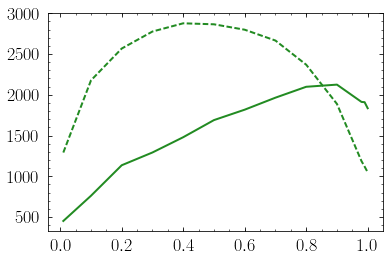

In [153]:
exc_small= get_exclusion(sig10, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig10, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig10 ])

cutoff=10000

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='forestgreen', ls='--', label=r'$M_d = 10$ GeV')
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='forestgreen', label=r'$M_d = 10$ GeV')

In [154]:
cutoff/(exc_large**(1/4.))

array([  451.44072327,   760.95366257,  1135.37463689,  1292.19838542,
        1479.49313551,  1689.5121468 ,  1817.3806336 ,  1964.70332323,
        2098.34008297,  2124.81393547,  1912.28049317,  1909.37075397,
        1835.15793187])

In [155]:
rinv

[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.98, 0.99, 1.0]

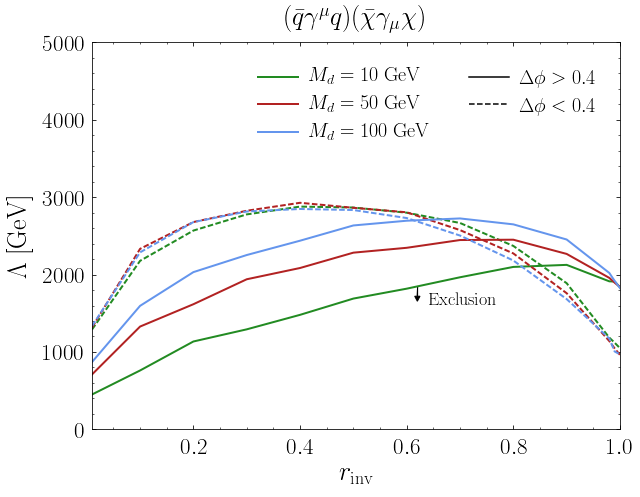

In [157]:
newfig("exc")
#plt.plot(rinv, np.sqrt(exc/(5./2.)**4), lw=3, alpha=0.3)

exc_small= get_exclusion(sig10, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig10, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig10 ])

cutoff=10000

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='forestgreen', ls='--', label=r'$M_d = 10$ GeV')
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='forestgreen', label=r'$M_d = 10$ GeV')


gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig20, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig20, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig20 ])

exc_small= get_exclusion(sig50, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig50, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig50 ])

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='firebrick', ls='--', label=r'$M_d = 50$ GeV')
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='firebrick', label=r'$M_d = 50$ GeV')


gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig100, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig100, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig100 ])

plt.plot(rinv, cutoff/(exc_small**(1/4.)), lw=2, 
                 color='cornflowerblue', ls='--', label=r'$M_d = 100$ GeV')
plt.plot(rinv, cutoff/(exc_large**(1/4.)), lw=2, 
                 color='cornflowerblue', label=r'$M_d = 100$ GeV')

              
exc_small= get_exclusion(sig500, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig500, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig500 ])

exc_small= get_exclusion(sig1000, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig1000, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig1000 ])


#plt.yscale('log', nonposy='clip')
plt.xlabel(r'$r_{\rm inv}$',fontsize=26)
plt.ylabel(r'$\Lambda$ [GeV]',fontsize=26)
plt.xlim([0.01,1.0])
plt.ylim([0, 5000])
# plt.savefig("cxn.pdf")

# plt.legend(bbox_to_anchor=(0, 0, 0.98, 0.95),
#            fontsize=20, ncol=1,frameon=False,
#            handletextpad=.5,
#            borderaxespad=0.)

plt.title(title, fontsize=26)


ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])

plt.tick_params(axis='both', which='major', labelsize=23)
# ax.set_yticklabels(ticklabels)

handles,labels = ax.get_legend_handles_labels()
handles = [handles[i] for i in [1,3,5]] + [Line2D([],[],color='k')]  + [Line2D([],[],color='k',ls='--')] #, handles[2]]
# handles = [Line2D([],[],color=plot_color[i]) for i in [1,3,5]] + [Line2D([],[],color='k')] + [Line2D([],[],color='k',ls='--')] #, handles[2]] + 
labels = [labels[1], labels[3],labels[5],r'$\Delta \phi > 0.4$',r'$\Delta \phi < 0.4$'] #, labels[2]]

leg = plt.legend(handles,labels,bbox_to_anchor=(0, 0, 0.97, 0.95),
           fontsize=20, ncol=2,frameon=False,
           handletextpad=.5,
           borderaxespad=0.)


ax = plt.axes()
ax.arrow(0.62, 1850., 0., -130, head_width=0.01, head_length=65, fc='k', ec='k')
plt.text(.64,1600,"Exclusion",fontsize=18)



# plt.show()
plt.tight_layout()
plt.savefig("ContactScaleLims.pdf")




# s-channel plots

In [21]:
lambda_3000 = 1548.65357316
lambda_5000 =  3743.29883336

cutoff_3000 = [ 1485.07670378 , 2450.23118162 , 2708.83651508 , 2770.73350109 , 2705.91322419,
  2581.59858384,  2384.91646329,  2124.34099165,  1807.69500818,  1433.7271455,
  1001.0815793 ,   914.37018511  , 828.87012743]
cutoff_5000 = [ 2617.81721115  ,4349.2052669  , 4853.46471387  ,4961.25056813 , 4871.77192798,
  4620.05198494 , 4231.12928779,  3755.42163159,  3158.10331018 , 2390.35808878,
  1389.37019555 , 1178.94000269 , 1011.11874624]

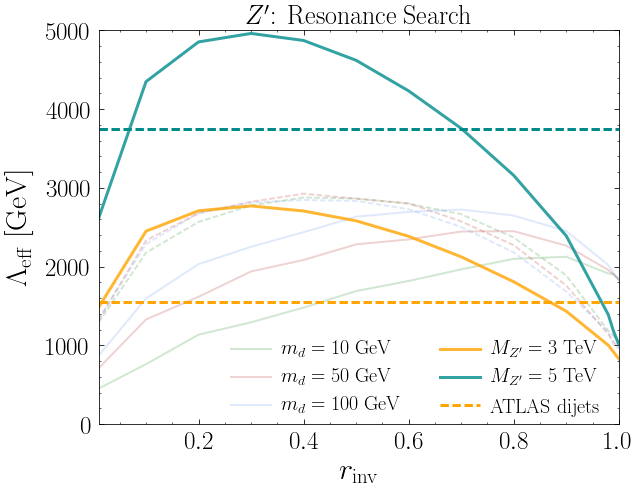

In [41]:
contactalpha = 0.2
newfig("exc")
#plt.plot(rinv, np.sqrt(exc/(5./2.)**4), lw=3, alpha=0.3)

gr_arr = []
le_arr = []

exc_small= get_exclusion(sig10, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig10, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig10 ])

cutoff=10000

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='forestgreen', ls='--', alpha=contactalpha)
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='forestgreen', label=r'$m_d = 10$ GeV', alpha=contactalpha)


gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig20, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig20, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig20 ])

# plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
#                  color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
# plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
#                  color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')

gr_arr.append(cutoff/(exc_large**(1/4))) 
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig50, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig50, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig50 ])

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='firebrick', ls='--',alpha=contactalpha)
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='firebrick', label=r'$m_d = 50$ GeV',alpha=contactalpha)




gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig100, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig100, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig100 ])

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='cornflowerblue', ls='--',alpha=contactalpha)
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='cornflowerblue', label=r'$m_d = 100$ GeV',alpha=contactalpha)


gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig500, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig500, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig500 ])

# plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
#                  color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
# plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
#                  color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')

gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))

exc_small= get_exclusion(sig1000, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig1000, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig1000 ])

# plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
#                  color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
# plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
#                  color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')




plt.plot(rinv, cutoff_3000, color='orange', lw=3,alpha=.8,label=r"$M_{Z^\prime} = 3 \;\textrm{TeV}$")
plt.plot(rinv, cutoff_5000, color='darkcyan', lw=3,alpha=.8,label=r"$M_{Z^\prime} = 5 \;\textrm{TeV}$")

plt.axhline(lambda_3000, color='orange', ls='--', lw=3, label=r'$\textrm{ATLAS dijets}$')
plt.axhline(lambda_5000, color='darkcyan', ls='--', lw=3)


#plt.yscale('log', nonposy='clip')
plt.xlabel(r'$r_{\rm inv}$',fontsize=30)
plt.ylabel(r'$\Lambda_{\rm eff}$ [GeV]',fontsize=30)
plt.xlim([0.01,1.0])
plt.ylim([0, 5000])
# plt.savefig("cxn.pdf")

plt.legend(bbox_to_anchor=(0, 0, 0.98, 0.95),
           fontsize=20, ncol=2,frameon=False,
           handletextpad=.5,
           borderaxespad=0.)

plt.title("$Z^\prime$: Resonance Search", fontsize=26)
# plt.show()
plt.tight_layout()
plt.savefig("LambdaZprimeRes.pdf")


In [ ]:
contactalpha = 0.2
newfig("exc")
#plt.plot(rinv, np.sqrt(exc/(5./2.)**4), lw=3, alpha=0.3)

gr_arr = []
le_arr = []

exc_small= get_exclusion(sig10, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig10, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig10 ])

cutoff=10000

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='forestgreen', ls='--', alpha=contactalpha)
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='forestgreen', label=r'$m_d = 10$ GeV', alpha=contactalpha)


gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig20, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig20, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig20 ])

# plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
#                  color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
# plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
#                  color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')

gr_arr.append(cutoff/(exc_large**(1/4))) 
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig50, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig50, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig50 ])

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='firebrick', ls='--',alpha=contactalpha)
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='firebrick', label=r'$m_d = 50$ GeV',alpha=contactalpha)




gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig100, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig100, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig100 ])

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='cornflowerblue', ls='--',alpha=contactalpha)
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='cornflowerblue', label=r'$m_d = 100$ GeV',alpha=contactalpha)


gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig500, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig500, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig500 ])

# plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
#                  color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
# plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
#                  color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')

gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))

exc_small= get_exclusion(sig1000, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig1000, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig1000 ])

# plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
#                  color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
# plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
#                  color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')




plt.plot(rinv, cutoff_3000, color='orange', lw=3,alpha=.8,label=r"$M_{Z^\prime} = 3 \;\textrm{TeV}$")
plt.plot(rinv, cutoff_5000, color='darkcyan', lw=3,alpha=.8,label=r"$M_{Z^\prime} = 5 \;\textrm{TeV}$")

plt.axhline(lambda_3000, color='orange', ls='--', lw=3, label=r'$\textrm{ATLAS dijets}$')
plt.axhline(lambda_5000, color='darkcyan', ls='--', lw=3)


#plt.yscale('log', nonposy='clip')
plt.xlabel(r'$r_{\rm inv}$',fontsize=30)
plt.ylabel(r'$\Lambda_{\rm eff}$ [GeV]',fontsize=30)
plt.xlim([0.01,1.0])
plt.ylim([0, 5000])
# plt.savefig("cxn.pdf")

plt.legend(bbox_to_anchor=(0, 0, 0.98, 0.95),
           fontsize=20, ncol=2,frameon=False,
           handletextpad=.5,
           borderaxespad=0.)

plt.title("$s$-channel: Resonance Search", fontsize=26)
# plt.show()
plt.tight_layout()
plt.savefig("schannel.pdf")

# t-channel plots

In [29]:
cutoff1=[ 294.03663308 , 567.44840705 , 708.29653928,  806.77918334  ,879.09730996,
  916.85873811 , 933.02266067,  908.02556663  ,854.66895525 , 716.61769515,
  459.03150834 , 389.297541  ,  256.79011121]
cutoff2=[ 152.7350868   ,226.7698984  , 289.4608086  , 346.39789009 , 442.47342879,
  471.55718805  ,519.89008878 , 589.68660891 , 583.20256407,  553.95620026,
  516.79244831  ,487.48598757 , 491.30101899]
cutoff1_1000_pair=[ 381.1266407 ,  596.49542841 , 677.74965777 , 737.22714184 , 810.60010275,
  887.96792278 , 933.65154757 , 982.69804542 , 899.31063733  ,855.38587751,
  933.65154757 , 848.40255153]
cutoff2_1000_pair=[  315.44034222,   530.50530599 ,  783.18278794  , 870.95823718,  1004.12084901,
  1133.29149629 , 1231.72095128  ,1357.40777932 , 1497.24316799  ,1694.0966787,
  1693.70183036 , 1681.72581299]

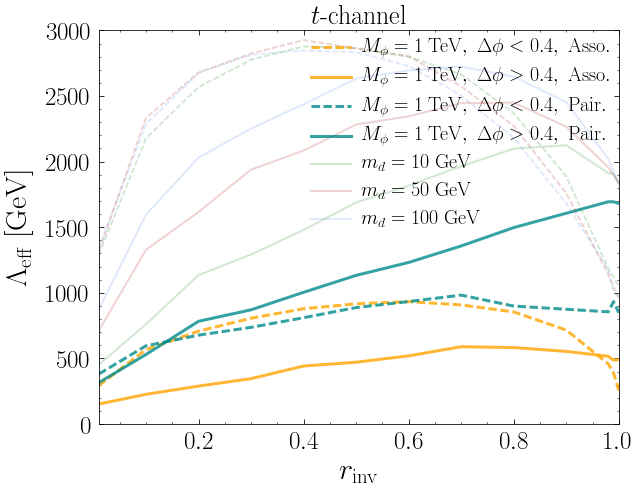

In [37]:
contactalpha = 0.2
newfig("exc")
#plt.plot(rinv, np.sqrt(exc/(5./2.)**4), lw=3, alpha=0.3)

rinv_pair=[.01,.1,.2,.3,.4,.5,.6,.7,.8,.98,.99,1]

rinv=[.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.98,.99,1]

plt.plot(rinv,cutoff1,label=r'$M_\phi = 1\;{\rm TeV},\; \Delta \phi < 0.4,\;{\rm Asso.}$',
         lw=3,alpha=.8,c='orange',ls='--')
plt.plot(rinv,cutoff2,label=r'$M_\phi = 1\;{\rm TeV},\; \Delta \phi > 0.4,\;{\rm Asso.}$',
         lw=3,alpha=.8,c='orange')

plt.plot(rinv_pair,cutoff1_1000_pair,label=r'$M_\phi = 1\;{\rm TeV},\; \Delta \phi < 0.4,\;{\rm Pair.}$',
         lw=3,alpha=.8,c='darkcyan',ls='--')

plt.plot(rinv_pair,cutoff2_1000_pair,label=r'$M_\phi = 1\;{\rm TeV},\; \Delta \phi > 0.4,\;{\rm Pair.}$',
         lw=3,alpha=.8,c='darkcyan')



gr_arr = []
le_arr = []

exc_small= get_exclusion(sig10, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig10, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig10 ])

cutoff=10000

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='forestgreen', ls='--', alpha=contactalpha)
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='forestgreen', label=r'$m_d = 10$ GeV', alpha=contactalpha)


gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig20, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig20, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig20 ])

# plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
#                  color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
# plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
#                  color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')

gr_arr.append(cutoff/(exc_large**(1/4))) 
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig50, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig50, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig50 ])

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='firebrick', ls='--',alpha=contactalpha)
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='firebrick', label=r'$m_d = 50$ GeV',alpha=contactalpha)




gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig100, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig100, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig100 ])

plt.plot(rinv, cutoff/(exc_small**(1/4)), lw=2, 
                 color='cornflowerblue', ls='--',alpha=contactalpha)
plt.plot(rinv, cutoff/(exc_large**(1/4)), lw=2, 
                 color='cornflowerblue', label=r'$m_d = 100$ GeV',alpha=contactalpha)


gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig500, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig500, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig500 ])

# plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
#                  color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
# plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
#                  color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')

gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))

exc_small= get_exclusion(sig1000, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig1000, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig1000 ])

# plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
#                  color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
# plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
#                  color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')




# plt.plot(rinv, cutoff_3000, color='orange', lw=3,alpha=.8,label=r"$M_{Z^\prime} = 3 \;\textrm{TeV}$")
# plt.plot(rinv, cutoff_5000, color='darkcyan', lw=3,alpha=.8,label=r"$M_{Z^\prime} = 5 \;\textrm{TeV}$")

# plt.axhline(lambda_3000, color='orange', ls='--', lw=3, label=r'$\textrm{ATLAS dijets}$')
# plt.axhline(lambda_5000, color='darkcyan', ls='--', lw=3)




#plt.yscale('log', nonposy='clip')
plt.xlabel(r'$r_{\rm inv}$',fontsize=30)
plt.ylabel(r'$\Lambda_{\rm eff}$ [GeV]',fontsize=30)
plt.xlim([0.01,1.0])
plt.ylim([0, 3000])
# plt.savefig("cxn.pdf")

plt.legend(
           fontsize=20, ncol=1,frameon=False,
           handletextpad=.5,
           borderaxespad=0., loc='upper right')

plt.title("$t$-channel", fontsize=26)
# plt.show()
plt.tight_layout()
plt.savefig("tchannel.pdf")

